<a href="https://colab.research.google.com/github/daJarae/ML_DL/blob/main/%EB%B0%91%EB%B0%94%EB%8B%A5%EB%94%A5%EB%9F%AC%EB%8B%9D_3%EC%9E%A5_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#정리


이모티콘 띄우는 함수!

In [42]:
def imti(name):
  import matplotlib.pyplot as plt
  from matplotlib.image import imread
  plt.imshow(imread(name+'.png'))
  plt.show()

#신경망과 퍼셉트론


신경망에서도 층, 뉴런이 연결되는 방식은 퍼셉트론과 비슷하나 **활성화 함수**가 다르다



tmi: n층 신경망은 문헌에 따라 (출력층을 제외하고) 가중치가 존재하는 항만 셀수도, 전체 층을 셀 수도 있음

**편향은 모든 층에서 입력값으로 추가**됨 (입력 신호는 항상 1로 편향 가중치 w가 편향 값을 조정하는 셈)

#활성화 함수


입력 신호의 총합을 출력 신호로 변환하는 함수

입력 신호의 총합이 '활성화'를 일으키는지 정한다는 의미에서 활성화 라고 하는데, 

최종 출력이 아닐 때도 있으므로 pass/ non-pass 같은 의미의 활성화보다는 활성 정도...로 생각하는 게 나을지도 

#계단 함수

특정 숫자인 **임계값을 기점으로** 그보다 크거나 작은 입력값의 출력이 다른 함수

    if y=>1: return 1
        else: return 0

위 if문(계단 함수)가 퍼셉트론의 활성화 함수!

참고로 아래 코드는 배열을 x로 받을 때 모호해지는 문제로 인해 ValueError가 발생한다

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(0,5,0.1)

def f(x):
  if x>=2:
    return 1
  else:
    return 0

plt.plot(x, f(x))
plt.title('Step')
plt.show()

ValueError: ignored

아래 케이스들과 혼동할 수 있다는 문제인듯하다

In [13]:
x.all()>=2

False

In [14]:
x.any()>=2

False

그러나 각 배열 원소들에 대한 활성화 여부를 알고 싶은 것이므로 아래의 식이 적절함

In [11]:
x=np.array([1,2,3])
x>=2

array([False,  True,  True])

교재에 따르면, 실수 x뿐 아니라 넘파이 배열을 인수로 쓸 수 있는 코드는

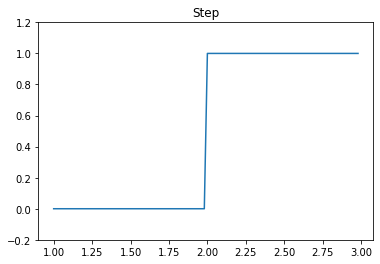

In [22]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(1,3,0.02)

def f(x):
  y= x>2 #y는 True, False로 구성된 배열
  return y.astype(np.int)  #bool array를 1,0으로 구성된 array로 변경

plt.plot(x, f(x))
plt.title('Step')
plt.ylim(-0.2,1.2) #y축 범위
plt.show()

#시그모이드 함수

시그모이드(='S모양인') 함수는 신경망에서 자주 이용하는 활성화 함수로, 식은 1/(1+exp(-x))

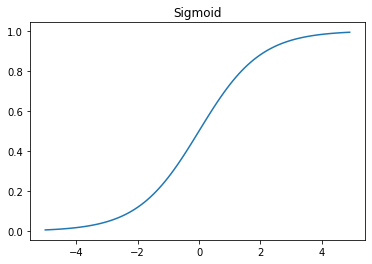

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(-5,5,0.1)

def f(x):
  from math import e
  return 1/(1+e**(-x))

plt.plot(x, f(x))
plt.title('Sigmoid')
plt.show()

np.exp를 쓸수도 있다

In [23]:
def Sigmoid(x):
  return 1/(1+np.exp(-x))

갑자기 궁금해지는...시그모이드 친구 그림

In [31]:
x=np.arange(-10,10,0.5)

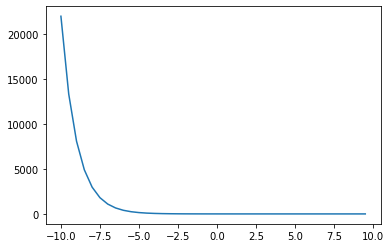

In [46]:
def tomo1(x):
  return 1+np.exp(-x)

plt.plot(x, tomo1(x))
plt.show()

exp의 역할은 출력의 양수화

★exp(x)가 아닌 exp(-x)인 이유는???

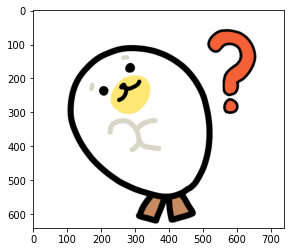

In [44]:
imti('why')

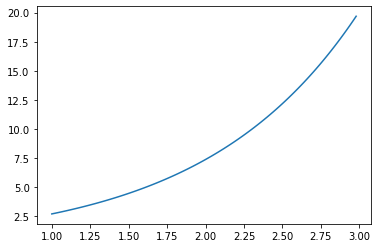

In [29]:
def tomo2(x):
  return 1/(np.exp(-x))

plt.plot(x, tomo2(x))
plt.show()

exp의 역수를 취하고 분모+1 하면 미분시 대칭인 종모양이 되고 y->0일 때 x->-inf, y->1일 때 x->inf로 입력값의 위치를 밸런스있게 펴진다


(1/(np.exp(-x))는 미분시 자기 자신이어서 저거랑 미분 모양 똑같음.

미분이 비대칭일 경우 동일 가중치 학습할 때 조차 동일 학습률 적용하기 어려울듯..)

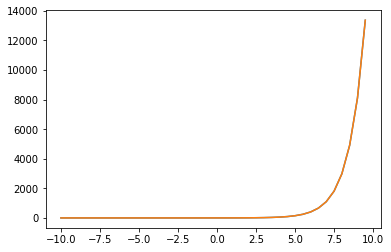

In [36]:
plt.plot(x, tomo2(x), label='1/e(-x)')
plt.plot(x, np.exp(x), label='e(x)')
plt.show()

엥..?


ㅋㅋㅋ뒤늦게 깨달은 사실... 1/e(-x)=e(x)엿다.

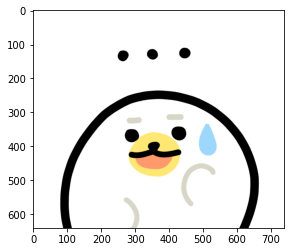

In [45]:
imti('what')

그렇다면 시그모이드 함수는

1)  출력을 양수로 한정하면서 (e(x))

2) 이 값이 0과 1사이가 되도록 (1/1+e(x))로 변형하고

*단순히 1/e(x)면 y값은 1/0부터 1/inf인데
분모 부분에 1을 더해줌으로써 1/1부터 1/inf 까지로 범위 제한 (1~0)

3) x 값이 커질수록 y값이 커지는... 비례적인 그래프가 더 직관적이므로 e(x) 대신 e(-x)사용...한 것

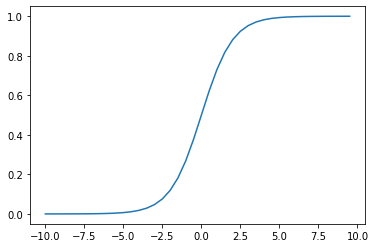

In [65]:
plt.plot(x, 1/(1+np.exp(-x)))
plt.show()

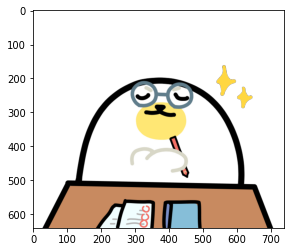

In [62]:
imti('confident')

계단 함수보다는 덜 가파르지만 잠재 임계값 전후로 가파르고, 무엇보다 **미분 가능한 점이** 학습을 가능하게 만든다는 점에서

시그모이드 활성화 함수가 인간이 수동 조작하는 퍼셉트론과 딥러닝에 속하는 "신경망"을 구분한 것인듯?



-> 맞는 추론! 계단/시그 둘다 **출력 범위 0,1 사이**에서 **입력이 중요하다면 큰 값을 반환**

연속적인 출력값을 갖는 시그모이드 함수의 '매끄러움'이 신경망 학습에서 매우 중요한 역할을 함

#활성화함수로서 비선형 함수의 중요성

신경망에서 층을 쌓는 혜택을 얻고 싶다면 비선형함수를 활성화 함수로 사용해야 한다.

여러 가중치 배열들과의 선형 결합으로 아무리 복잡하게 중첩 계산되어도 단일 가중치 배열과의 선형 결합으로 전개할 수 있어,

 유명무실하게 존재하는 은닉층들이 발생하기 때문이다.



---



#ReLu 함수

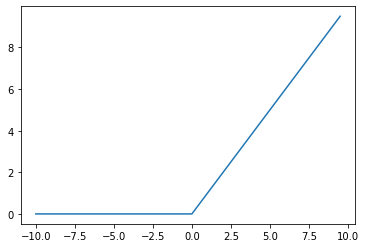

In [67]:
def ReLu(x):
  return np.maximum(0,x)

plt.plot(x, ReLu(x))
plt.show()

직선 하나로 표현되지 않으므로 ReLu도 비선형이다.

#다시 배열

In [70]:
A=np.array([[1,2],
            [3,4],
            [5,6]])
print(A.shape) #행x열
print(np.ndim(A)) #2차원

(3, 2)
2


In [72]:
B=np.array([[1],
            [2]])
np.dot(A,B) #행렬곱

array([[ 5],
       [11],
       [17]])

행렬의 형상: 행렬곱 AxB에서 A열=B행이어야 하고 결과 행렬의 크기는 (A행,B열)

참고로 1차원 배열일 때도 대응하는 차원 원소수가 일치되게 계산됨

참고로 np.dot(B,A)는 에러남.

In [74]:
B=np.array([1,2])
np.dot(A,B) #행렬곱 오류 발생 안함 (원래 1*2인데 2*1인 vertical array?로 간주하는듯)

array([ 5, 11, 17])

#간단 신경망 구현

In [78]:
X=np.array([1,0.5])
w1=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
b1=np.array([0.1,0.2,0.3])

input1=np.dot(X,w1)+b1

def sigmoid(x):
  return 1/(1+np.exp(-x))

output1=sigmoid(input1)

#이런 과정을 w2와 b2, w3와 b3...에 대해 반복하고 최종 input에 대해 출력층 활성화함수 통과 후 결과 y 출력! 

참고로 초기 w,b들을 따로 딕셔너리에 넣어두고 그때그때 재할당 하는 식으로 코드를 구성할수도 있다

#출력층

출력층의 활성화함수: 계산된 ouput을 원하는 예측값에 적합한 형태로 내보내는 역할

일반적으로 회귀에는 항등함수(계산값 그대로 출력), 분류에는 소프트맥스함수(각 클래스로 예측될 확률 - 합이 1이 되도록)를 사용한다

In [79]:
def softmax(x):
  return np.exp(x)/sum(np.exp(x)) #배열의 모든값을 exp에 대입

In [80]:
softmax(np.array([0.5,0.5,0.7]))

array([0.31042377, 0.31042377, 0.37915245])

#오버플로

지수함수 결과값이 너무 커서 매우 큰값을 계산해야할 때 결과가 불안정해지는 것 

(컴퓨터가 4바이트나 8바이트와 같이 크기가 유한한 데이터를 다루다보니 표현할 수 있는 수의 범위가 한정되어 너무 큰 값을 표현할 수 없음)

exp()/exp()에서 (지수 계산) 각 지수에 같은 값을 더하거나 빼는 것은 최종 결과에 영향을 미치지 않으므로 다음과 같이 소프트맥스 함수를 수정해 오버플로 문제를 예방할 수 있다

In [81]:
def softmax(x):
  c=np.max(x) #최댓값을 고정 상수 c로 놓고
  return np.exp(x-c)/sum(np.exp(x-c)) #배열의 모든값을 exp에 대입

In [82]:
softmax(np.array([0.5,0.5,0.7]))
#당연히 결과는 동일함
#지수함수가 단증함수라서 대소관계 변하지 않음

array([0.31042377, 0.31042377, 0.37915245])

출력 총합이 1인 소프트맥스 함수의 성질로 인해 출력값을 확률로 해석할 수 있으며,

 'k번째 확률이 가장 높으니 k번 클래스로 예측한다'는 직관적인 결론을 낼 수 있다

 그러나 현업에서는 지수 함수 계산에 드는 자원 낭비를 줄이고자 생략함

 (어쩐지,, 어차피 결과가 제일 큰 클래스만 알면 되는거면 뭐하러 번거롭게 '확률로 표현되는 값 구하기'같은 おしゃれ한 작업을 추가하나 했네)